In [2]:
# set execution environment
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from numpy.linalg import inv

In [4]:
face_data = loadmat("face_emotion_data.mat")
features = face_data['X']  # 128 * 9 matrix
labels = face_data['y'] # 128 * 1 vector

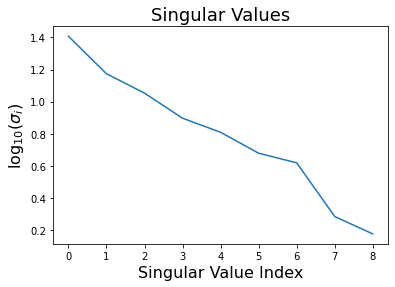

In [5]:
# SVD of feature matrix
U, s, VT = np.linalg.svd(features, full_matrices = False)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel("Singular Value Index", fontsize = 16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Singular Values', fontsize=18)
plt.show()


In [8]:
def frobinius(matrix):
    reshaped = matrix.reshape(1, 96*9)
    squared_sum = 0;
    for i in range(96*9):
        squared_sum += reshaped[0, i] ** 2
    return np.sqrt(squared_sum)

In [20]:
for i in range(8):
    for j in range(i + 1, 8):
        # Split training set, validation set, test set
        validation_feature = features[16 * i: 16*(i + 1), :]
        validation_label = labels[16 * i: 16*(i + 1), :]
        test_feature = features[16 * j: 16*(j + 1), :]
        test_lable = labels[16 * j: 16*(j + 1), :]

        # Note: delete sequence matters
        training_feature = np.delete(features, np.s_[16 * j: 16*(j + 1)], axis=0)
        training_feature = np.delete(training_feature, np.s_[16 * i: 16*(i + 1)], axis = 0)
        training_label = np.delete(labels, np.s_[16 * j: 16*(j + 1)], axis=0)
        training_label = np.delete(training_label, np.s_[16 * i: 16*(i + 1)], axis = 0)

        # get the SVD
        U, s, VT = np.linalg.svd(training_feature)
        approximated_matrix = np.zeros((96, 9))
        # Approximation to the Feature Matrix by different rank-r
        for r in range(1, 10):
            for k in range(r):
                approximated_matrix += s[k] * U[:, k].reshape(96, 1) @ VT[k].reshape(1,9)

            print("Error size of rank", r, "approximation is", frobinius(training_feature - approximated_matrix))


Error size of rank 1 approximation is 18.661746368739685
Error size of rank 2 approximation is 23.425993123753706
Error size of rank 3 approximation is 40.98190409828922
Error size of rank 4 approximation is 62.879357507930926
Error size of rank 5 approximation is 86.49282536914247
Error size of rank 6 approximation is 111.04681954417364
Error size of rank 7 approximation is 136.1753087616008
Error size of rank 8 approximation is 161.71204663977383
Error size of rank 9 approximation is 187.5100753994048
Error size of rank 1 approximation is 17.698654256592967
Error size of rank 2 approximation is 23.791740574536263
Error size of rank 3 approximation is 41.82148932281418
Error size of rank 4 approximation is 63.84020572154511
Error size of rank 5 approximation is 87.3730051511685
Error size of rank 6 approximation is 111.805359847197
Error size of rank 7 approximation is 136.79466557266394
Error size of rank 8 approximation is 162.17601805537507
Error size of rank 9 approximation is 187